In [ ]:
# EDA data
import pandas as pd
import numpy as np

# Visualization data
import matplotlib.pyplot as plt

# Normalized
from sklearn.preprocessing import StandardScaler

# PCA And T-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Import Models
from sklearn.cluster import KMeans 

# Evalotion
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
url = "https://raw.githubusercontent.com/shaadclt/Customer-Segmentation-KMeansClustering/refs/heads/main/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df.iloc[:, [3,4]]

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [5]:
for col in X.columns:
    Q1 ,Q3 = np.quantile(X[col] , [0.25 , 0.75])
    IQR = Q3 - Q1

    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR

    df.loc[X[col] > max_IQR , col] = np.nan
    df.loc[X[col] < min_IQR , col] = np.nan

df.dropna(inplace=True)

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [8]:
df_pca = pd.DataFrame(X , columns=['pca1' , 'pca2'])
df_pca['Costumer ID'] = df['CustomerID']

df_pca

,pca1,pca2,Costumer ID
0,-1.537109,-0.922207,1.0
1,-0.384168,-2.075149,2.0
2,-2.416002,0.010665,3.0
3,-0.466982,-1.938355,4.0
4,-1.455678,-0.895678,5.0
...,...,...,...
195,2.394866,0.813689,196.0
196,1.156805,2.375629,197.0
197,2.419550,1.112883,198.0
198,1.179183,2.947027,NaN


In [9]:
df_pca.dropna(inplace=True)

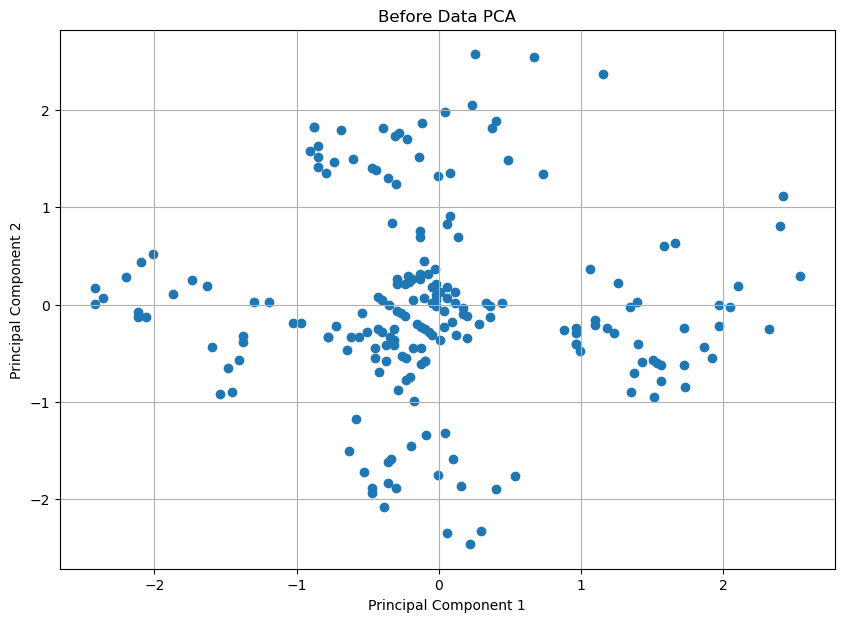

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(df_pca['pca1'] , df_pca['pca2'])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title("Before Data PCA")
plt.grid(True)
plt.show();

In [11]:
wcss = []
for i in range(1 ,11):
    kmeans = KMeans(n_clusters=i , init='k-means++' , random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

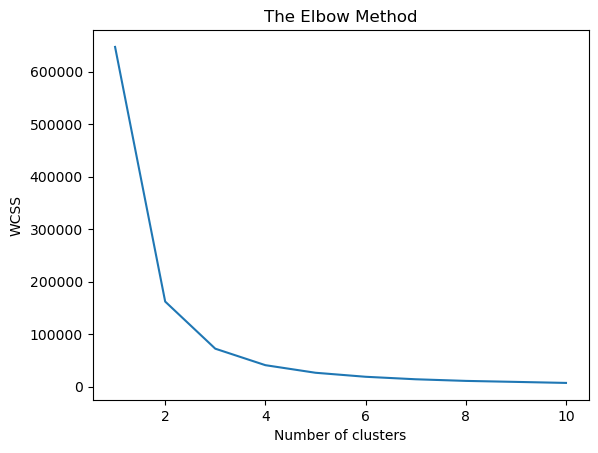

In [12]:
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

In [13]:
kmeans = KMeans(n_clusters=5 , init='k-means++' , random_state=42)
labels = kmeans.fit_predict(df_pca[['pca1', 'pca2']])

In [14]:
sil_score = silhouette_score(df_pca[["pca1" , "pca2"]] , labels)
print(f"Silhouette Score : {sil_score}\n")

Silhouette Score : 0.5612768693602196



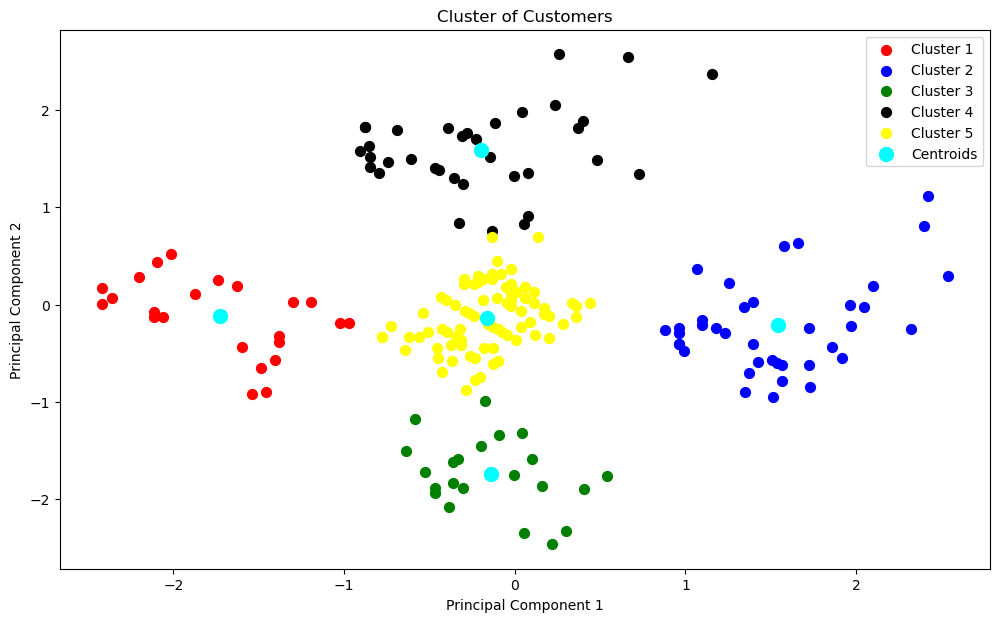

In [18]:
plt.figure(figsize=(12,7))
plt.scatter(df_pca.loc[labels == 0, 'pca1'] , df_pca.loc[labels == 0 ,'pca2'] , s = 50 , c="red" , label="Cluster 1")
plt.scatter(df_pca.loc[labels == 1, 'pca1'] , df_pca.loc[labels == 1 ,'pca2'] , s = 50 , c="blue" , label="Cluster 2")
plt.scatter(df_pca.loc[labels == 2, 'pca1'] , df_pca.loc[labels == 2 ,'pca2'] , s = 50 , c="green" , label="Cluster 3")
plt.scatter(df_pca.loc[labels == 3, 'pca1'] , df_pca.loc[labels == 3 ,'pca2'] , s = 50 , c="black" , label="Cluster 4")
plt.scatter(df_pca.loc[labels == 4, 'pca1'] , df_pca.loc[labels == 4 ,'pca2'] , s = 50 , c="yellow" , label="Cluster 5")

plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s = 100 , c="cyan" , label="Centroids")

plt.title('Cluster of Customers')
plt.xlabel('Principal Component 1') # Updated label to reflect PCA
plt.ylabel('Principal Component 2') # Updated label to reflect PCA
plt.legend()
plt.show();

In [16]:
# The End

## خیلی سعی کردم که داده هام رو هم بتونم روی
## dbscan
# بتونم مدل کنم اما نشد